In [1]:
import os
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
gtcontent = np.genfromtxt('gt.txt',delimiter =';', dtype= None,encoding=None)

In [3]:
dictFileNamesFromGTfile ={}
for i in range (0,len(gtcontent)):
    #File name is the first element in the annotation file
    file_name = gtcontent[i][0]
    # taking next 4 coordinates of the object location in image
    objectLocation = [gtcontent[i][1],gtcontent[i][2],gtcontent[i][3],gtcontent[i][4],gtcontent[i][5]]
    #Class ID- as last element in the annotation
    classID = gtcontent[i][-1]
    #If multiple objects, store coordinates and classes as list of lists
    if(file_name in dictFileNamesFromGTfile):
        dictFileNamesFromGTfile[file_name].append(objectLocation)
    else:
        dictFileNamesFromGTfile[file_name] = [objectLocation]
print("Total Number of Images at least having a traffic sign : " + str(len(dictFileNamesFromGTfile)))

Total Number of Images at least having a traffic sign : 741


{11: 53, 40: 26, 38: 171, 13: 187, 39: 12, 4: 140, 9: 84, 21: 10, 2: 149, 12: 155, 1: 127, 25: 53, 30: 32, 23: 46, 27: 6, 35: 42, 15: 23, 33: 37, 28: 30, 18: 74, 36: 19, 26: 37, 37: 6, 34: 36, 0: 7, 24: 9, 14: 66, 20: 24, 29: 7, 6: 37, 10: 211, 8: 171, 5: 101, 16: 12, 19: 3, 17: 83, 3: 54, 7: 75, 41: 16, 31: 3, 22: 26, 42: 21, 32: 14}


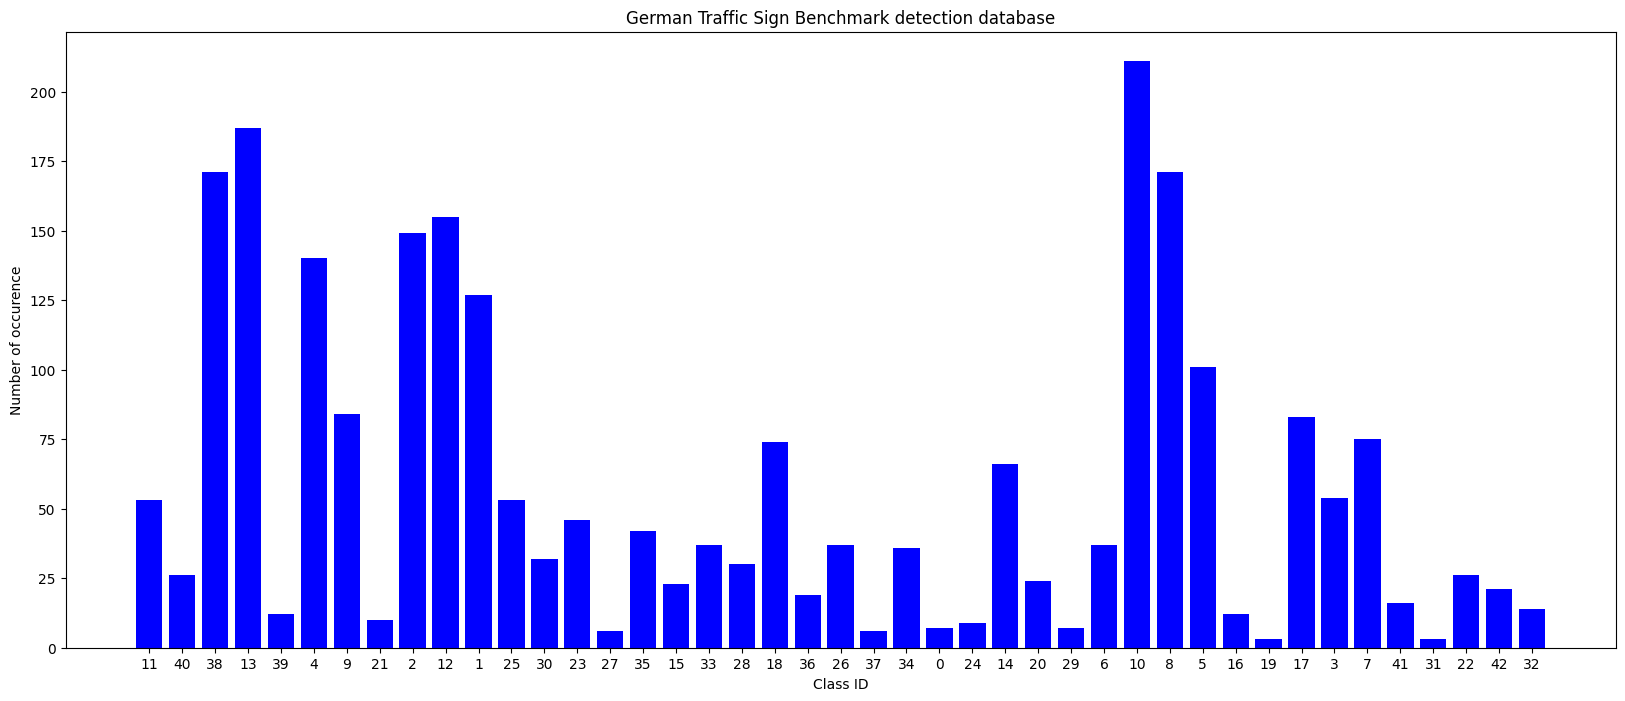

In [5]:
#Checking distribution of records across files

class_list = {}

for i in dictFileNamesFromGTfile:
    for j in dictFileNamesFromGTfile[i][:]:
        for k in range(len(dictFileNamesFromGTfile[i])):
            classID = dictFileNamesFromGTfile[i][:][k][-1]
            if classID in class_list:
                class_list[classID] += 1 # If already class ID there in the class list, that means it already had some example. So incrementig it.
            else:
                class_list[classID] = 1 # If this is first time classID list has been fetched then it is set to 1
                
# Checking all classes 
print(class_list)

# Now creating plot
claaID_x = []
count_y = []
for i in class_list:
    claaID_x.append(str(i)) # ClassID_x coordinate added with class ID
    count_y.append(class_list[i]) # For same index y coordinate added with the count

x_pos = [i for i, _ in enumerate(claaID_x)]
plt.figure(figsize=(20,8))
plt.bar(x_pos, count_y, color='blue')
plt.xlabel("Class ID")
plt.ylabel("Number of occurence")
plt.title("German Traffic Sign Benchmark detection database")
#plt.figure(figsize=(30,30))
plt.xticks(x_pos, claaID_x)

plt.show()

In [32]:
# Checking which image does not have any traffic sign
import re
# extracting all the keys available in the dict created from ground truth file. That means these are the files, where traffic sign is there.
listofkeys= [key for key, value in dic.items()]
ppmFileList=os.listdir('C:/Users/tkon/_11Research/FinalResearch/GTSDB/FullIJCNN2013')
# These list contains all the files available in GTSDB dataset
files = [f for f in ppmFileList if re.match(r'[0-9]+.*\.ppm', f)]
# checking the files which do not have any data in ground truth file. That means these files do not 
noTrafficSignImages=[]
for file in files:
    if file not in listofkeys:
        noTrafficSignImages.append(file)
#Print all the file names where no traffic sign
print(noTrafficSignImages)
#printing  the length to find how many files there are no data.
print(len(noTrafficSignImages))

['00108.ppm', '00139.ppm', '00145.ppm', '00213.ppm', '00235.ppm', '00308.ppm', '00321.ppm', '00324.ppm', '00325.ppm', '00326.ppm', '00327.ppm', '00328.ppm', '00329.ppm', '00331.ppm', '00332.ppm', '00335.ppm', '00336.ppm', '00342.ppm', '00345.ppm', '00354.ppm', '00361.ppm', '00364.ppm', '00365.ppm', '00381.ppm', '00389.ppm', '00394.ppm', '00399.ppm', '00407.ppm', '00409.ppm', '00424.ppm', '00429.ppm', '00437.ppm', '00442.ppm', '00454.ppm', '00462.ppm', '00464.ppm', '00469.ppm', '00489.ppm', '00495.ppm', '00506.ppm', '00510.ppm', '00511.ppm', '00522.ppm', '00525.ppm', '00526.ppm', '00529.ppm', '00532.ppm', '00533.ppm', '00534.ppm', '00535.ppm', '00537.ppm', '00538.ppm', '00539.ppm', '00540.ppm', '00541.ppm', '00543.ppm', '00546.ppm', '00547.ppm', '00549.ppm', '00550.ppm', '00553.ppm', '00555.ppm', '00558.ppm', '00559.ppm', '00561.ppm', '00562.ppm', '00563.ppm', '00568.ppm', '00569.ppm', '00572.ppm', '00573.ppm', '00574.ppm', '00576.ppm', '00577.ppm', '00578.ppm', '00579.ppm', '00580.ppm'

In [ ]:
listofkeys